# **Importing libraries**

In [4]:
import tensorflow as tf #neural network training framework
import os #operating system dependent tasks, such as data loading, creating logs and checkpoints and saving models
import pathlib#oop interface for working with file system paths
from pathlib import Path
import time #functions related to time, such as tracking training time
import datetime #logging checkpoints and formatting timestamps

from matplotlib import pyplot as plt #to plot curves and see progress in data
from IPython.display import display
from IPython.display import clear_output #to display images or plots during training

In [8]:
import keras
print(keras.__version__)
print(tf.__version__)

2.15.0
2.15.0


In [6]:
pip install tensorflow==2.15.0

Note: you may need to restart the kernel to use updated packages.


# **Importing dataset**

In [9]:
dataset_name = 'Hubble telescope images'
dataset_pathname = "/kaggle/input/top-100-hubble-telescope-images"
# Convert the string path to a Path object
dataset_path = Path(dataset_pathname)

# Checking the dataset

In [10]:
number_of_images=len(list(dataset_path.iterdir()))
print(f"Number of images:{number_of_images}")

Number of images:99


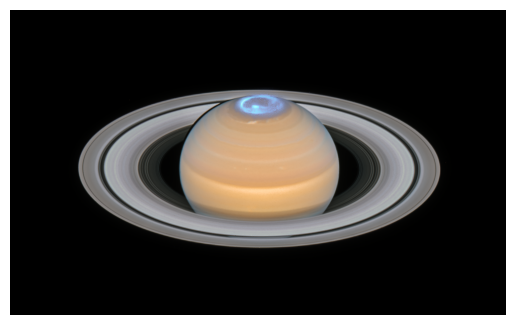

In [11]:
from PIL import Image
for image_path in dataset_path.iterdir():
        with Image.open(image_path) as img:
            plt.imshow(img)
            plt.axis('off') 
            plt.show()
        break

# Resizing and converting images from .tif to .jpeg

Tensorflow does not work well with .tif images hence we call a function to convert the images and resize them to prevent memory issues and maintain consistency

In [12]:
import cv2
dataset_path = Path("/kaggle/input/top-100-hubble-telescope-images")  
output_path = Path("/kaggle/working/")  

target_height = 256
target_width = 256

# Function to resize an image to a target size
def resize_image(image, target_height, target_width):
    # Resize the image using cubic interpolation for quality
    resized_image = cv2.resize(image, (target_width, target_height), interpolation=cv2.INTER_CUBIC)
    return resized_image

for file in dataset_path.iterdir():
    if file.is_file():
        file_path = str(file)
        
        image = cv2.imread(file_path)

        resized_image = resize_image(image, target_height, target_width)
        
        # Changing extension to JPEG
        output_file_path = output_path / (file.stem + '.jpg')
        
        cv2.imwrite(str(output_file_path), resized_image, [int(cv2.IMWRITE_JPEG_QUALITY), 90])
        
        print(f"Converted and resized {file.name} to {output_file_path.name}")

print("Conversion and resizing complete.")


Converted and resized heic1815a.tif to heic1815a.jpg
Converted and resized heic0817a.tif to heic0817a.jpg
Converted and resized heic0406a.tif to heic0406a.jpg
Converted and resized potw1805a.tif to potw1805a.jpg
Converted and resized potw1802a.tif to potw1802a.jpg
Converted and resized potw1752a.tif to potw1752a.jpg
Converted and resized heic0206c.tif to heic0206c.jpg
Converted and resized heic0108a.tif to heic0108a.jpg
Converted and resized heic0503a.tif to heic0503a.jpg
Converted and resized heic0822a.tif to heic0822a.jpg
Converted and resized opo0511a.tif to opo0511a.jpg
Converted and resized heic1105a.tif to heic1105a.jpg
Converted and resized heic0411a.tif to heic0411a.jpg
Converted and resized opo0006a.tif to opo0006a.jpg
Converted and resized heic1716a.tif to heic1716a.jpg
Converted and resized heic1410a.tif to heic1410a.jpg
Converted and resized opo9942a.tif to opo9942a.jpg
Converted and resized potw1818a.tif to potw1818a.jpg
Converted and resized heic0707a.tif to heic0707a.jpg

# **Calling a function to store them real images separately and convert them into tensors.**

In [13]:
def ogimages(datapath):
    ogimages = []
    file_paths = []
    
    for file in datapath.rglob('*'):
        # Ensure the path points to a file and has a valid image extension
        if file.is_file() and file.suffix.lower() in ['.jpg', '.jpeg', '.png', '.tif', '.tiff']:
            file_path = str(file)
            
            image = tf.io.read_file(file_path)
            image = tf.io.decode_image(image)
            
            # Convert the image to float32 tensor
            image = tf.cast(image, tf.float32)
            
            # Append the image tensor to the list
            ogimages.append(image)
            
            # Also append the file path 
            file_paths.append(file_path)
    
    return ogimages, file_paths

real_images, rfiles = ogimages(output_path)

In [14]:
print(f"Type of rfiles: {type(rfiles)}")
print(f"Contents of rfiles: {rfiles[:5]}")  

Type of rfiles: <class 'list'>
Contents of rfiles: ['/kaggle/working/heic0206a.jpg', '/kaggle/working/opo0010a.jpg', '/kaggle/working/heic0515a.jpg', '/kaggle/working/potw1805a.jpg', '/kaggle/working/opo9607a.jpg']


# Converting to b/w
Calling a function to convert input images into black and white images and store them as tensors.

In [15]:
def input_images1(datapath):
    input_images = []
    file_paths = []
    
    for file in datapath.rglob('*'):
        if file.is_file() and file.suffix.lower() in ['.jpg', '.jpeg', '.png', '.tif', '.tiff']:
            file_path = str(file) 
            
            image = tf.io.read_file(file_path)
            image = tf.io.decode_image(image) 
           
            image = tf.cast(image, tf.float32)
            
            # Convert the image to grayscale
            if image.shape[-1] == 3:  # Check if the image has 3 channels (RGB)
                image = tf.image.rgb_to_grayscale(image)
            
            input_images.append(image)
            
            # Also append the file path to the file paths list
            file_paths.append(file_path)            
    
    # Return the list of grayscale images as float32 tensors
    return input_images, file_paths

bnw_images, bnwfiles = input_images1(output_path)

print(f"Number of grayscale images loaded: {len(bnw_images)}")


Number of grayscale images loaded: 99


Checking if functions have been executed properly

In [16]:
# Print the shape and data type of a real image and input image
print(f"Real image shape: {real_images[0].shape}, dtype: {real_images[0].dtype}")
print(f"Grayscale image shape: {bnw_images[0].shape}, dtype: {bnw_images[0].dtype}")

Real image shape: (256, 256, 3), dtype: <dtype: 'float32'>
Grayscale image shape: (256, 256, 1), dtype: <dtype: 'float32'>


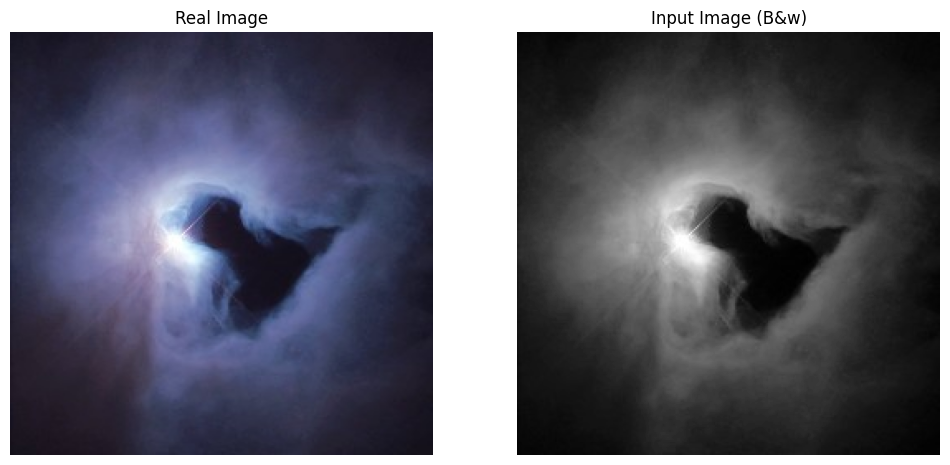

In [17]:
import matplotlib.pyplot as plt

real_image= real_images[1]
input_image = bnw_images[1] 

# Display the images
plt.figure(figsize=(12, 6))

# Display the real image
plt.subplot(1, 2, 1)
plt.imshow(real_image/255.0)
plt.title('Real Image')
plt.axis('off')

# Display the input image (grayscale)
plt.subplot(1, 2, 2)
plt.imshow(input_image/255.0, cmap='gray')  # Use 'gray' colormap for grayscale images
plt.title('Input Image (B&w)')
plt.axis('off')

# Show the plot
plt.show()


# Splitting the dataset into training, testing and validation sets

In [18]:
from sklearn.model_selection import train_test_split
import shutil

# Define the split ratios
test_ratio = 0.2  # 20% for testing
val_ratio = 0.1   # 10% for validation 

# Combine real and input images into pairs
data_pairs = list(zip(real_images, bnw_images))

# Split the data pairs into training, testing, and validation sets
train_data, temp_data = train_test_split(data_pairs, test_size=test_ratio, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=val_ratio / (1 - test_ratio), random_state=42)

# Define the output directories for splits
train_path = output_path / "train"
val_path = output_path / "val"
test_path = output_path / "test"

# Create the directories 
train_path.mkdir(parents=True, exist_ok=True)
val_path.mkdir(parents=True, exist_ok=True)
test_path.mkdir(parents=True, exist_ok=True)

# Function to save images in pairs to directories
def save_images(data_pairs, directory, real_subdir, input_subdir):
    # Create subdirectories
    real_dir = directory / real_subdir
    input_dir = directory / input_subdir
    real_dir.mkdir(parents=True, exist_ok=True)
    input_dir.mkdir(parents=True, exist_ok=True)
    
    # Save images
    for idx, (real_img, bnw_img) in enumerate(data_pairs):
        # Define file paths for the new images
        real_path = real_dir / f"image_{idx}.jpg"
        bnw_path = input_dir / f"image_{idx}.jpg"
        
        # Save the real image
        tf.keras.utils.save_img(real_path, real_img, scale=True)
        
        # Save the grayscale image
        tf.keras.utils.save_img(bnw_path, bnw_img, scale=True)

# Save the training, validation, and testing data
save_images(train_data, train_path, "real", "input")
save_images(val_data, val_path, "real", "input")
save_images(test_data, test_path, "real", "input")

print("Data split and saved into training, validation, and testing sets.")


Data split and saved into training, validation, and testing sets.


# Prepocessing images

In [19]:
# The set consists of 99 images
BUFFER_SIZE = 99
# The batch size of 1 produced better results for the U-Net in the original pix2pix experiment
BATCH_SIZE = 1
# Each image is 256x256 in size
IMG_WIDTH = 256
IMG_HEIGHT = 256

In [20]:
#troubleshooting: dimensions of both images mismatch, modifying preprocessing functions
def resize(input_image, real_image, height, width):
  input_image = tf.image.resize_with_pad(input_image,target_height=height, target_width=width)                             
  real_image = tf.image.resize_with_pad(real_image,target_height=height, target_width=width)                             

  return input_image, real_image

def random_crop(input_image, real_image):
    # Find the minimum channel dimension between input_image and real_image
    min_channels = min(input_image.shape[-1], real_image.shape[-1])
    
    # Random cropping on both images
    cropped_input = tf.image.random_crop(input_image, size=[IMG_HEIGHT, IMG_WIDTH, min_channels])
    cropped_real = tf.image.random_crop(real_image, size=[IMG_HEIGHT, IMG_WIDTH, 3])

    return cropped_input, cropped_real
@tf.function()
def random_jitter(input_image, real_image):
    # Resizing both images to 286x286
    input_image, real_image = resize(input_image, real_image, 286, 286)

    # Perform random cropping back to 256x256
    input_image, real_image = random_crop(input_image, real_image)

    # Apply random horizontal flip
    if tf.random.uniform([]) > 0.5:
        input_image = tf.image.flip_left_right(input_image)
        real_image = tf.image.flip_left_right(real_image)

    return input_image, real_image


def normalize(input_image, real_image):
    # Convert images to tf.float32
    input_image = tf.cast(input_image, tf.float32)
    real_image = tf.cast(real_image, tf.float32)
    
    # Normalize images to range [-1, 1]
    input_image = (input_image / 127.5) - 1
    real_image = (real_image / 127.5) - 1
    
    return input_image, real_image

# Reviewing preprocessing functions

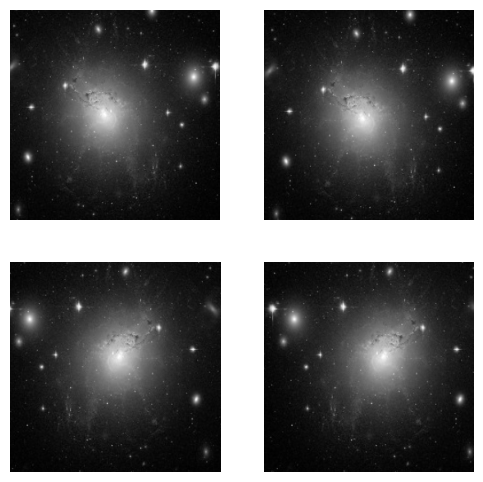

In [21]:
import matplotlib.pyplot as plt
import random

# Randomly select one real image and one bnw image
idx = random.randint(0, len(real_images) - 1)
inp = bnw_images[idx]  # Use the bnw_images list
re = real_images[idx]  # Use the real_images list

# Now inp and re have a pair of images at the same index

# Continue with your plotting code
plt.figure(figsize=(6, 6))
for i in range(4):
    # Call the random jitter function (assumed to take the input and real images as arguments)
    rj_inp, rj_re = random_jitter(inp, re)
    
    # Plot the jittered input image
    plt.subplot(2, 2, i + 1)
    plt.imshow(rj_inp / 255.0,cmap='gray')
    plt.axis('off')

plt.show()

# Creating an input data pipeline

In [22]:
# Define a function to load an image pair (grayscale input and RGB real images) from file paths
def load_image_pair(input_path, real_path):
    # Add debug print statements to check the types of input_path and real_path
    print(f"load_image_pair - input_path type: {type(input_path)}, real_path type: {type(real_path)}")
    print(f"load_image_pair - input_path value: {input_path}, real_path value: {real_path}")

    input_image = tf.io.read_file(input_path)
    real_image = tf.io.read_file(real_path)

    # Add debug print statements to check the types of input_image and real_image
    print(f"load_image_pair - input_image type: {type(input_image)}, real_image type: {type(real_image)}")

    input_image = tf.io.decode_jpeg(input_image, channels=1)  # Load grayscale image
    real_image = tf.io.decode_jpeg(real_image, channels=3)  # Load RGB image

    # Add debug print statements to check the final loaded images
    print(f"load_image_pair - final input_image type: {type(input_image)}, final real_image type: {type(real_image)}")

    return input_image, real_image

# Define a function to preprocess an image pair
def preprocess_image_pair(input_path, real_path):
    # Add debug print statements to check the types of input_path and real_path
    print(f"preprocess_image_pair - input_path type: {type(input_path)}, real_path type: {type(real_path)}")

    input_image, real_image = load_image_pair(input_path, real_path)

    # Add debug print statements to check the types of input_image and real_image after loading
    print(f"preprocess_image_pair - input_image type: {type(input_image)}, real_image type: {type(real_image)}")

    # Apply preprocessing functions
    input_image, real_image = resize(input_image, real_image, 286, 286)
    input_image, real_image = random_crop(input_image, real_image)
    input_image, real_image = normalize(input_image, real_image)

    # Add debug print statements to check the final preprocessed images
    print(f"preprocess_image_pair - final input_image type: {type(input_image)}, final real_image type: {type(real_image)}")

    return input_image, real_image

# Define a function to create a dataset from file paths and preprocess image pairs
def create_dataset(input_paths, real_paths, batch_size, shuffle=True):
    # Create a TensorFlow dataset from the file paths
    dataset = tf.data.Dataset.from_tensor_slices((input_paths, real_paths))
    
    # Add debug print statements to check the dataset and data types
    print(f"create_dataset - dataset: {dataset}")
    print(f"create_dataset - input_paths type: {type(input_paths)}, real_paths type: {type(real_paths)}")

    # Apply the preprocessing function to each pair of paths
    dataset = dataset.map(preprocess_image_pair, num_parallel_calls=tf.data.experimental.AUTOTUNE)

    # Shuffle the dataset
    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(input_paths))

    # Batch the dataset
    dataset = dataset.batch(batch_size)

    # Return the created dataset
    return dataset

# Create dataset
batch_size = 1
train_dataset = create_dataset(rfiles, bnwfiles, batch_size=batch_size)


create_dataset - dataset: <_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>
create_dataset - input_paths type: <class 'list'>, real_paths type: <class 'list'>
preprocess_image_pair - input_path type: <class 'tensorflow.python.framework.ops.SymbolicTensor'>, real_path type: <class 'tensorflow.python.framework.ops.SymbolicTensor'>
load_image_pair - input_path type: <class 'tensorflow.python.framework.ops.SymbolicTensor'>, real_path type: <class 'tensorflow.python.framework.ops.SymbolicTensor'>
load_image_pair - input_path value: Tensor("args_0:0", shape=(), dtype=string), real_path value: Tensor("args_1:0", shape=(), dtype=string)
load_image_pair - input_image type: <class 'tensorflow.python.framework.ops.SymbolicTensor'>, real_image type: <class 'tensorflow.python.framework.ops.SymbolicTensor'>
load_image_pair - final input_image type: <class 'tensorflow.python.framework.ops.SymbolicTensor'>, final rea

In [23]:
def preprocess_test_image(input_path, real_path):
    # Add debug print statements to check the types and values of input_path and real_path
    print(f"preprocess_test_image - input_path type: {type(input_path)}, real_path type: {type(real_path)}")
    print(f"preprocess_test_image - input_path value: {input_path}, real_path value: {real_path}")

    # Load and decode images
    input_image = tf.io.read_file(input_path)
    real_image = tf.io.read_file(real_path)

    # Add debug print statements to check the types of input_image and real_image
    print(f"preprocess_test_image - input_image type: {type(input_image)}, real_image type: {type(real_image)}")

    # Decode JPEG images
    input_image = tf.io.decode_jpeg(input_image, channels=1)  # Load grayscale image
    real_image = tf.io.decode_jpeg(real_image, channels=3)  # Load RGB image

    # Add debug print statements to check the types and values of the decoded images
    print(f"preprocess_test_image - decoded input_image type: {type(input_image)}, decoded real_image type: {type(real_image)}")

    # Resize the images to the desired size
    input_image, real_image = resize(input_image, real_image, IMG_HEIGHT, IMG_WIDTH)
    
    # Normalize the images
    input_image, real_image = normalize(input_image, real_image)
    
    # Add debug print statements to check the final processed images
    print(f"preprocess_test_image - final input_image type: {type(input_image)}, final real_image type: {type(real_image)}")

    return input_image, real_image
def create_test_dataset(input_paths, real_paths, batch_size=1):
    # Create a TensorFlow dataset from the file paths
    dataset = tf.data.Dataset.from_tensor_slices((input_paths, real_paths))
    
    # Add debug print statements to check the dataset and data types
    print(f"create_test_dataset - dataset: {dataset}")
    print(f"create_test_dataset - input_paths type: {type(input_paths)}, real_paths type: {type(real_paths)}")

    # Apply the preprocessing function to each image pair in the dataset
    dataset = dataset.map(preprocess_test_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    
    # Add debug print statements to check the dataset after applying the map function
    print(f"create_test_dataset - dataset after map: {dataset}")

    # Batch the dataset
    dataset = dataset.batch(batch_size)

    # Add debug print statements to check the final batched dataset
    print(f"create_test_dataset - final dataset: {dataset}")

    return dataset

test_dataset = create_test_dataset(bnwfiles, rfiles, batch_size=1)

create_test_dataset - dataset: <_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>
create_test_dataset - input_paths type: <class 'list'>, real_paths type: <class 'list'>
preprocess_test_image - input_path type: <class 'tensorflow.python.framework.ops.SymbolicTensor'>, real_path type: <class 'tensorflow.python.framework.ops.SymbolicTensor'>
preprocess_test_image - input_path value: Tensor("args_0:0", shape=(), dtype=string), real_path value: Tensor("args_1:0", shape=(), dtype=string)
preprocess_test_image - input_image type: <class 'tensorflow.python.framework.ops.SymbolicTensor'>, real_image type: <class 'tensorflow.python.framework.ops.SymbolicTensor'>
preprocess_test_image - decoded input_image type: <class 'tensorflow.python.framework.ops.SymbolicTensor'>, decoded real_image type: <class 'tensorflow.python.framework.ops.SymbolicTensor'>
preprocess_test_image - final input_image type: <class 'tensorf

# Defining generator (U-NET ARCHITECTURE)

In [24]:
OUTPUT_CHANNELS = 3

# Encoder

In [25]:
def downsample(filters, size, apply_batchnorm=True):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
      tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))

  if apply_batchnorm:
    result.add(tf.keras.layers.BatchNormalization())

  result.add(tf.keras.layers.LeakyReLU())

  return result

In [26]:
down_model = downsample(3, 4)
down_result = down_model(tf.expand_dims(inp, 0))
print (down_result.shape)

(1, 128, 128, 3)


# Decoder

In [27]:
def upsample(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
    tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                    padding='same',
                                    kernel_initializer=initializer,
                                    use_bias=False))

  result.add(tf.keras.layers.BatchNormalization())

  if apply_dropout:
      result.add(tf.keras.layers.Dropout(0.5))

  result.add(tf.keras.layers.ReLU())

  return result

In [28]:
up_model = upsample(3, 4)
up_result = up_model(down_result)
print (up_result.shape)

(1, 256, 256, 3)


Combining upsampler and downsampler

Visualizing generator

In [29]:
def Generator():
  inputs = tf.keras.layers.Input(shape=[256, 256, 1])

  down_stack = [
    downsample(64, 4, apply_batchnorm=False),  # (batch_size, 128, 128, 64)
    downsample(128, 4),  # (batch_size, 64, 64, 128)
    downsample(256, 4),  # (batch_size, 32, 32, 256)
    downsample(512, 4),  # (batch_size, 16, 16, 512)
    downsample(512, 4),  # (batch_size, 8, 8, 512)
    downsample(512, 4),  # (batch_size, 4, 4, 512)
    downsample(512, 4),  # (batch_size, 2, 2, 512)
    downsample(512, 4),  # (batch_size, 1, 1, 512)
  ]

  up_stack = [
    upsample(512, 4, apply_dropout=True),  # (batch_size, 2, 2, 1024)
    upsample(512, 4, apply_dropout=True),  # (batch_size, 4, 4, 1024)
    upsample(512, 4, apply_dropout=True),  # (batch_size, 8, 8, 1024)
    upsample(512, 4),  # (batch_size, 16, 16, 1024)
    upsample(256, 4),  # (batch_size, 32, 32, 512)
    upsample(128, 4),  # (batch_size, 64, 64, 256)
    upsample(64, 4),  # (batch_size, 128, 128, 128)
  ]

  initializer = tf.random_normal_initializer(0., 0.02)
  last = tf.keras.layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer,
                                         activation='tanh')  # (batch_size, 256, 256, 3)

  x = inputs

  # Downsampling through the model
  skips = []
  for down in down_stack:
    x = down(x)
    skips.append(x)

  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    x = tf.keras.layers.Concatenate()([x, skip])

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

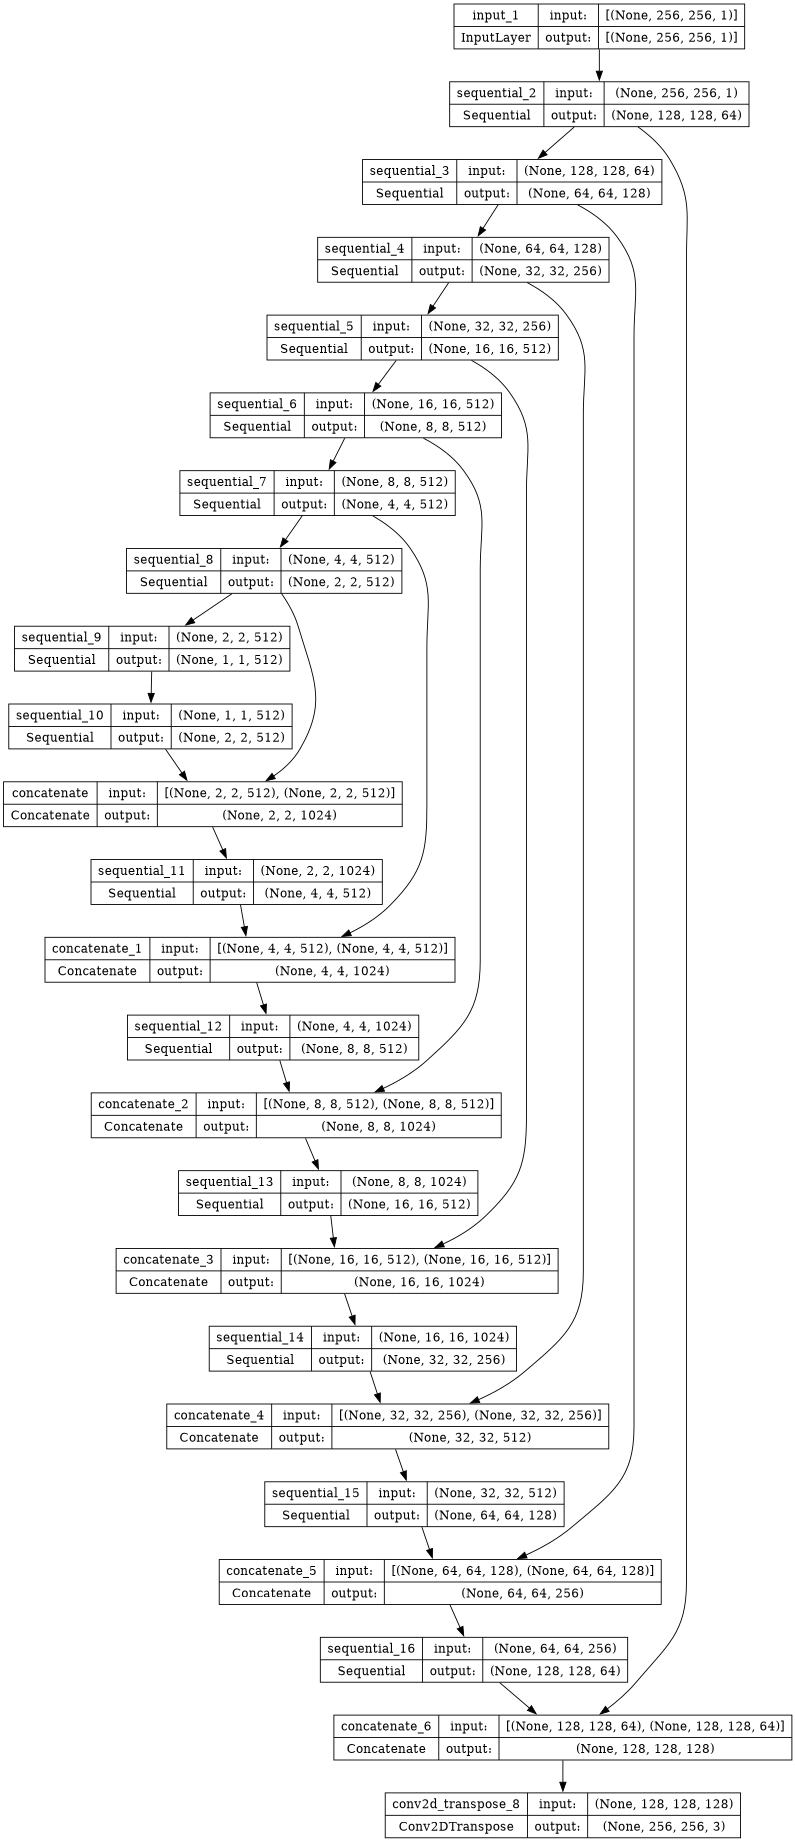

In [30]:
generator = Generator()
tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64)

# Testing the generator

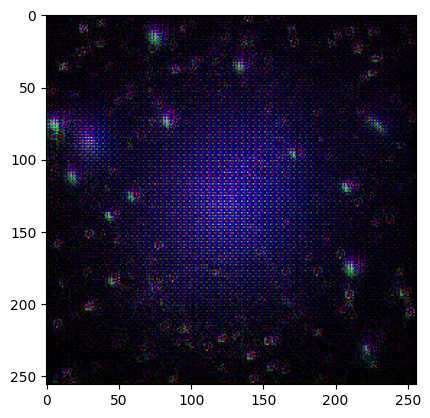

In [31]:
gen_output = generator(inp[tf.newaxis, ...], training=False)
plt.imshow(gen_output[0, ...])

# Defining generator loss

In [32]:
LAMBDA = 100

In [33]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [34]:
def generator_loss(disc_generated_output, gen_output, target):
  gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

  # Mean absolute error
  l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

  total_gen_loss = gan_loss + (LAMBDA * l1_loss)

  return total_gen_loss, gan_loss, l1_loss

# Defining discriminator (PatchGan)

In [35]:
def Discriminator():
  initializer = tf.random_normal_initializer(0., 0.02)
#inp expects 1 channel while tar expects 3
  inp = tf.keras.layers.Input(shape=[256, 256, 1], name='input_image')
  tar = tf.keras.layers.Input(shape=[256, 256, 3], name='target_image')

  x = tf.keras.layers.concatenate([inp, tar])  # (batch_size, 256, 256, channels*2)

  down1 = downsample(64, 4, False)(x)  # (batch_size, 128, 128, 64)
  down2 = downsample(128, 4)(down1)  # (batch_size, 64, 64, 128)
  down3 = downsample(256, 4)(down2)  # (batch_size, 32, 32, 256)

  zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3)  # (batch_size, 34, 34, 256)
  conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1)  # (batch_size, 31, 31, 512)

  batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

  leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

  zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)  # (batch_size, 33, 33, 512)

  last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2)  # (batch_size, 30, 30, 1)

  return tf.keras.Model(inputs=[inp, tar], outputs=last)

Visualizing discriminator

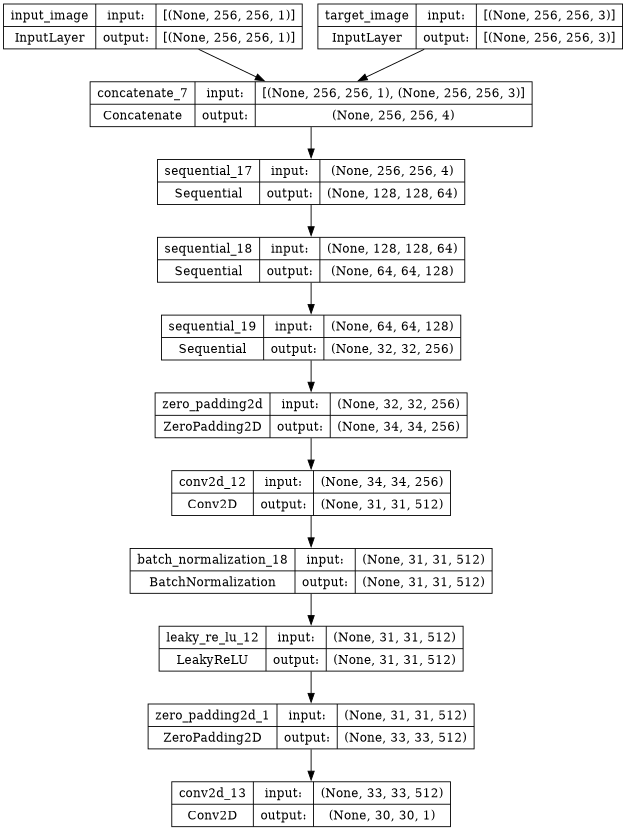

In [36]:
discriminator = Discriminator()
tf.keras.utils.plot_model(discriminator, show_shapes=True, dpi=64)

# Testing discriminator

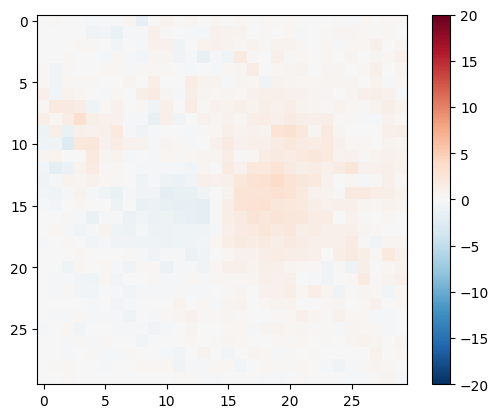

In [37]:
disc_out = discriminator([inp[tf.newaxis, ...], gen_output], training=False)
plt.imshow(disc_out[0, ..., -1], vmin=-20, vmax=20, cmap='RdBu_r')
plt.colorbar()

Defining discriminator loss

In [38]:
def discriminator_loss(disc_real_output, disc_generated_output):
  real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

  generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

  total_disc_loss = real_loss + generated_loss

  return total_disc_loss

# Defining optimizers and checkpoint saver

In [39]:
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [40]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

# Generating images

In [41]:
def generate_images(model, test_input, tar):
    prediction = model(test_input, training=True)
    plt.figure(figsize=(15, 15))
    
    display_list = [test_input[0], tar[0], prediction[0]]
    title = ['Input Image', 'Ground Truth', 'Predicted Image']
    
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        # For grayscale image, cmap='gray' is used to display it as grayscale.
        if i == 0:
            plt.imshow(display_list[i], cmap='gray')
        else:
            # Getting the pixel values in the [0, 1] range to plot.
            plt.imshow(display_list[i] * 0.5 + 0.5)
        plt.axis('off')
    plt.show()

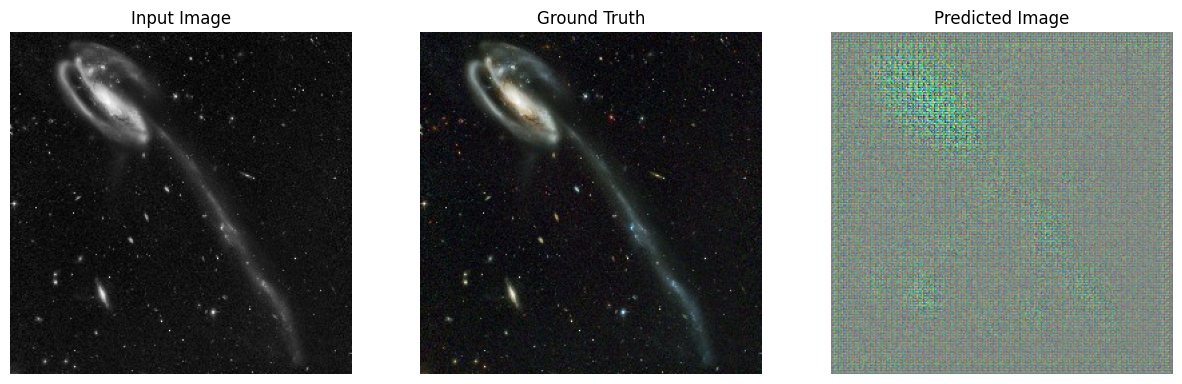

In [42]:
for example_input, example_target in test_dataset.take(1):
  generate_images(generator, example_input, example_target)

Note: Matplotlib automatically colors a b&w image in bgr. To avoid this, we use cmap='gray'

# Training

In [43]:
log_dir="logs/"

summary_writer = tf.summary.create_file_writer(
  log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

Calling a function to define PSNR value

PSNR value is the ratio of the maximum value of the pixel to the noise (MSE) that affects the quality of the pixels. It is given by:

PSNR = 20 * log10(MAX) - 10 * log10(MSE)

In [44]:
# Define the PSNR function
def psnr(y_true, y_pred):
    # Assume pixel values are in the range [0, 1]
    max_pixel = 1.0
    # Calculate MSE
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    # Calculate PSNR using the formula: PSNR = 20 * log10(MAX) - 10 * log10(MSE)
    psnr = tf.image.psnr(y_true, y_pred, max_val=max_pixel)
    return psnr

In [45]:
@tf.function
def train_step(input_image, target, step):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        gen_output = generator(input_image, training=True)

        disc_real_output = discriminator([input_image, target], training=True)
        disc_generated_output = discriminator([input_image, gen_output], training=True)

        gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
        disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

    generator_gradients = gen_tape.gradient(gen_total_loss, generator.trainable_variables)
    discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

    with summary_writer.as_default():
        tf.summary.scalar('gen_total_loss', gen_total_loss, step=step//1000)
        tf.summary.scalar('gen_gan_loss', gen_gan_loss, step=step//1000)
        tf.summary.scalar('gen_l1_loss', gen_l1_loss, step=step//1000)
        tf.summary.scalar('disc_loss', disc_loss, step=step//1000)

    # Normalize the generator output and target to [0, 1]
    gen_output_normalized = (gen_output + 1) / 2  
    target_normalized = (target + 1) / 2  

    # Calculate PSNR
    psnr_value = psnr(target_normalized, gen_output_normalized)
    return gen_total_loss, gen_gan_loss, gen_l1_loss, disc_loss, psnr_value

The actual training loop:

-Iterates over the number of steps.

-Every 10 steps print a dot (.).

-Every 1k steps: clear the display and run generate_images to show the progress.

-Every 5k steps: save a checkpoint.

-Saving the generator training every 5k steps

In [46]:
def fit(train_ds, test_ds, steps):
    example_input, example_target = next(iter(test_ds.take(1)))
    start = time.time()

    total_psnr = tf.constant(0.0)
    psnr_count = tf.constant(0.0)

    for step, (input_image, target) in train_ds.repeat().take(steps).enumerate():
        if (step) % 1000 == 0:
            clear_output(wait=True)

            if step != 0:
                print(f'Time taken for 1000 steps: {time.time()-start:.2f} sec\n')

            start = time.time()

            generate_images(generator, example_input, example_target)
            print(f"Step: {step//1000}k")

        gen_total_loss, gen_gan_loss, gen_l1_loss, disc_loss, psnr_value = train_step(input_image, target, step)

        total_psnr += tf.reduce_sum(psnr_value)
        psnr_count += tf.cast(tf.size(psnr_value), tf.float32)

        # Training step
        if (step + 1) % 10 == 0:
            print('.', end='', flush=True)

        # Save (checkpoint) the model every 5k steps
        if (step + 1) % 5000 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)
            generator.save(f'/kaggle/working/saved_generator_model_step_{step + 1}.h5')

    average_psnr = total_psnr / psnr_count if psnr_count > 0 else tf.constant(0.0)
    print(f"\nAverage PSNR over {psnr_count} steps: {average_psnr.numpy():.2f}")

Time taken for 1000 steps: 94.69 sec



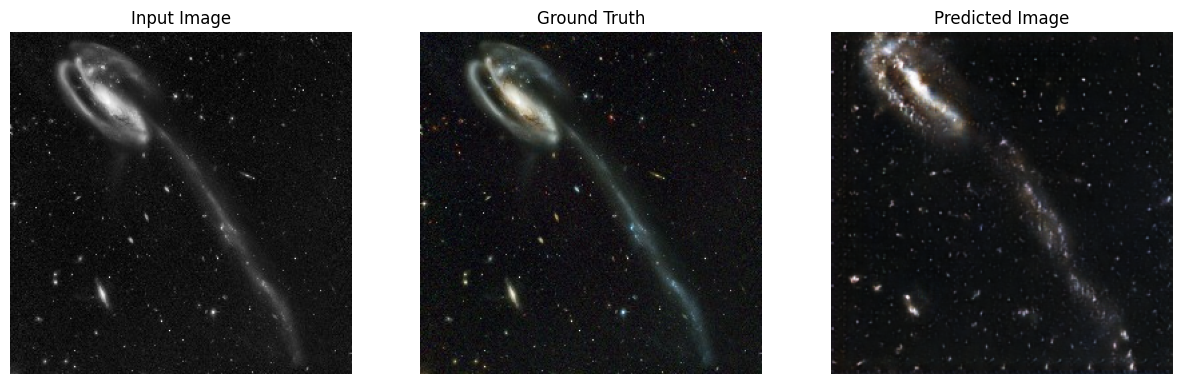

Step: 39k
....................................................................................................
Average PSNR over 40000.0 steps: 18.95


In [47]:
fit(train_dataset, test_dataset, steps=40000)

# Restore the latest checkpoint and test the network

In [48]:
ls {checkpoint_dir}

checkpoint                  ckpt-5.data-00000-of-00001
ckpt-1.data-00000-of-00001  ckpt-5.index
ckpt-1.index                ckpt-6.data-00000-of-00001
ckpt-2.data-00000-of-00001  ckpt-6.index
ckpt-2.index                ckpt-7.data-00000-of-00001
ckpt-3.data-00000-of-00001  ckpt-7.index
ckpt-3.index                ckpt-8.data-00000-of-00001
ckpt-4.data-00000-of-00001  ckpt-8.index
ckpt-4.index


In [49]:
# Restoring the latest checkpoint in checkpoint_dir
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

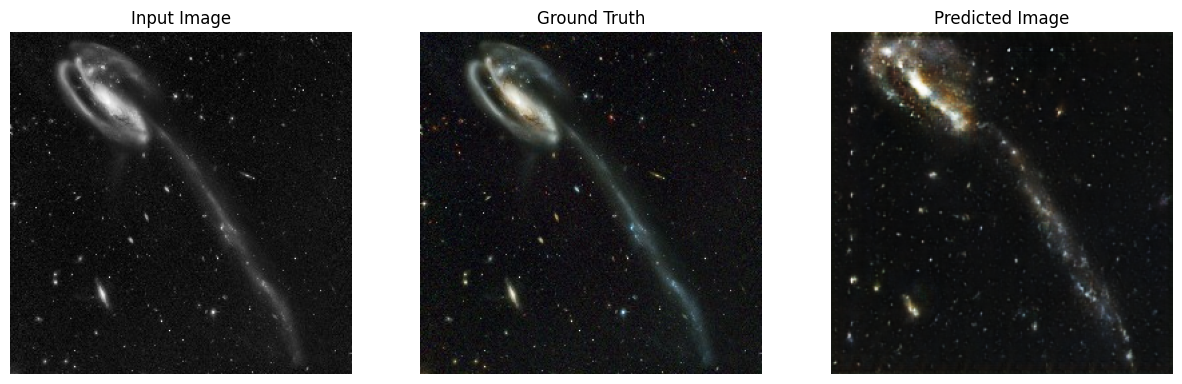

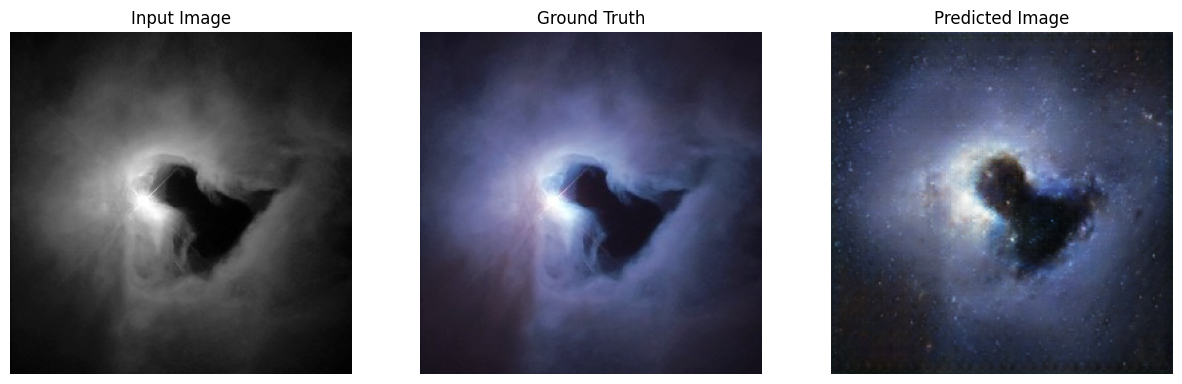

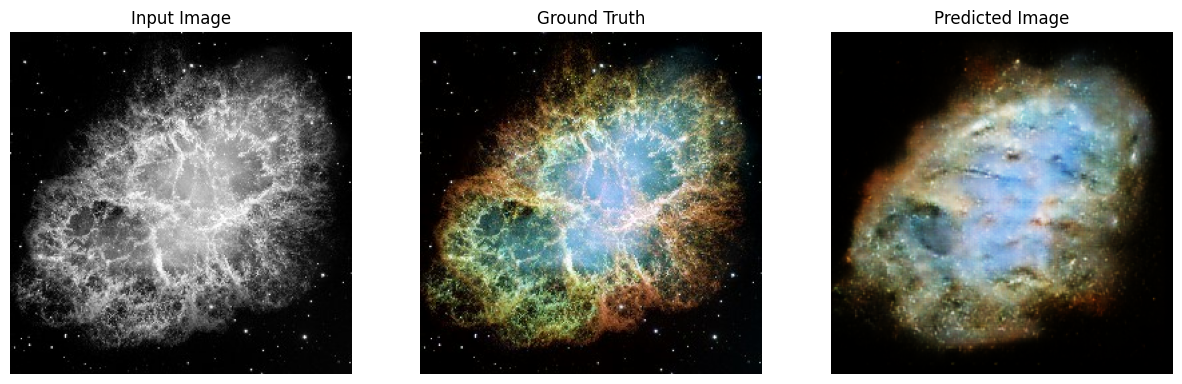

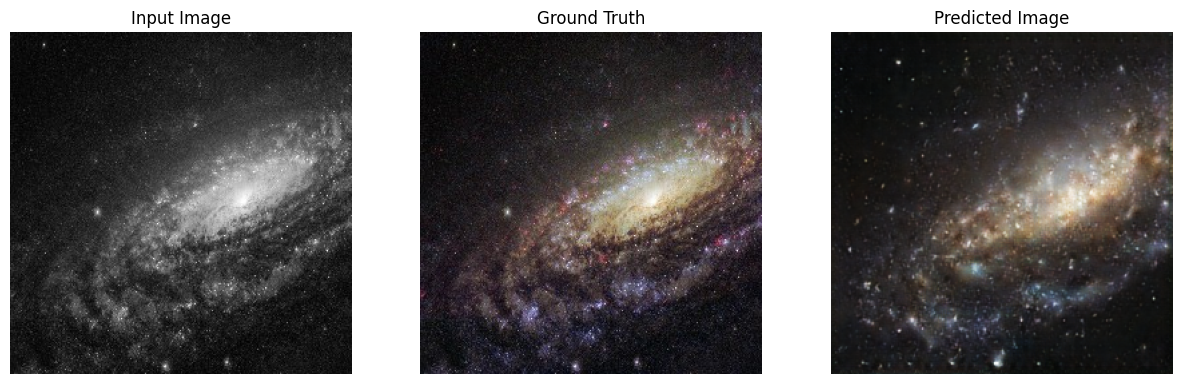

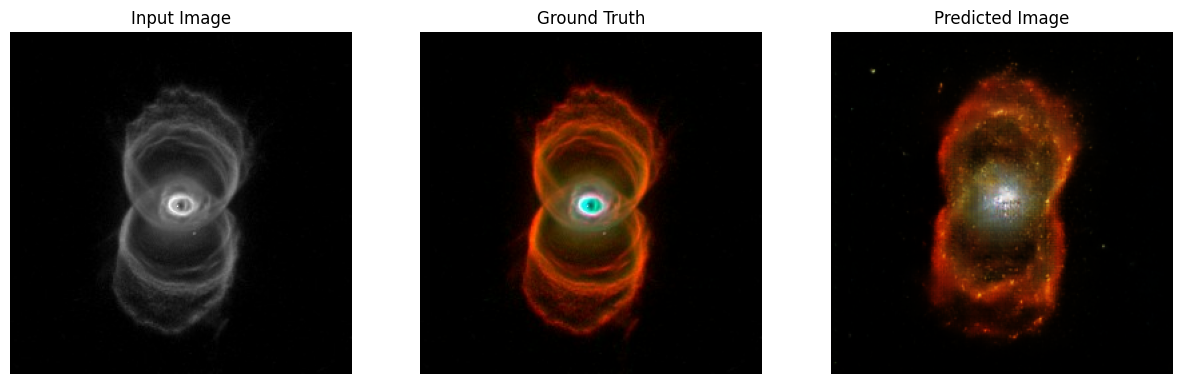

In [50]:
#Run the trained model on a few examples from the test set
for inp, tar in test_dataset.take(5):
    generate_images(generator, inp, tar)

# **To Save the trained model**

In [ ]:
# Save the model as HDF5 format
#tf.keras.models.save_model(generator, '/kaggle/working/saved_model_40k.h5', save_format='h5')

# Train for additional steps

In [ ]:
# Load the previously saved generator model
generator2 = tf.keras.models.load_model('/kaggle/working/saved_generator_model_step_40000.h5')

# Initialize the checkpoint manager
checkpoint_prefix = "/kaggle/working/checkpoint"
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

# Restore the latest checkpoint (if it includes optimizer state)
checkpoint.restore(tf.train.latest_checkpoint('/kaggle/working'))

def fit(train_ds, test_ds, steps):
    example_input, example_target = next(iter(test_ds.take(1)))
    start = time.time()

    total_psnr = tf.constant(0.0)
    psnr_count = tf.constant(0.0)

    for step, (input_image, target) in train_ds.repeat().take(steps).enumerate():
        if (step) % 1000 == 0:
            clear_output(wait=True)

            if step != 0:
                print(f'Time taken for 1000 steps: {time.time()-start:.2f} sec\n')

            start = time.time()

            generate_images(generator, example_input, example_target)
            print(f"Step: {step//1000}k")

        gen_total_loss, gen_gan_loss, gen_l1_loss, disc_loss, psnr_value = train_step(input_image, target, step)

        total_psnr += tf.reduce_sum(psnr_value)
        psnr_count += tf.cast(tf.size(psnr_value), tf.float32)

        # Training step
        if (step + 1) % 10 == 0:
            print('.', end='', flush=True)

        # Save (checkpoint) the model every 5k steps
        if (step + 1) % 5000 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)
            generator.save(f'/kaggle/working/saved_generator_model_step_{step + 1}.h5')

    average_psnr = total_psnr / psnr_count if psnr_count > 0 else tf.constant(0.0)
    print(f"\nAverage PSNR over {psnr_count} steps: {average_psnr.numpy():.2f}")

# Continue training for an additional 40,000 steps
fit(train_dataset, test_dataset, steps=40000)

# Visualise the new generator predictions

In [ ]:
generator3 = "/kaggle/working/saved_generator_model_step_80000.h5"
for inp, tar in test_dataset.take(5):
    generate_images(generator, inp, tar)